In [2]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
import matplotlib.pyplot as plt
from preprocessing import interpolate_reading
%matplotlib inline

database_train = load_database_train()

print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y'])


datalist = lista de objetos do tipo data,

datadict = lista dos objetos tipo data que foram convertidos para dicionario

X = np.array(datalist)

y = np.array de labels do X 

In [3]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,readings,spell,author,device,date
0,"{'ACC': [[5.275653999997303, -1.0534488, 4.271...",ALOHOMORA,GUILHERME,SAMSUNG_S8,2020-07-26 18:53:50.315695


In [5]:
df['readings'][0]

{'ACC': array([[ 5.27565400e+00, -1.05344880e+00,  4.27125600e+00,
          6.89051250e+00],
        [ 1.02806540e+01, -1.10851540e+00,  4.25689100e+00,
          7.00064560e+00],
        [ 1.52856540e+01, -1.20667770e+00,  4.20182400e+00,
          7.34062240e+00],
        ...,
        [ 1.35629065e+03,  2.32237560e-01,  9.00219860e-01,
          1.25144920e+01],
        [ 1.36129565e+03, -3.90254880e-01,  1.17076470e+00,
          1.17220120e+01],
        [ 1.36629965e+03, -1.05823720e+00,  1.46046300e+00,
          1.09630500e+01]]),
 'GYR': array([[ 0.0000000e+00, -3.0543262e-03,  3.0482176e-01, -1.9547688e-02],
        [ 5.0050000e+00, -5.8643065e-02,  1.6126843e-01, -4.8258353e-02],
        [ 1.0010000e+01, -1.0873401e-01,  7.1471240e-02, -6.9027774e-02],
        ...,
        [ 1.3510150e+03,  3.2009340e-01,  7.8862700e-01, -1.4453071e+00],
        [ 1.3560200e+03,  3.9950588e-01,  6.4934975e-01, -1.4789047e+00],
        [ 1.3610240e+03,  4.5631635e-01,  4.2516220e-01, -1.499063

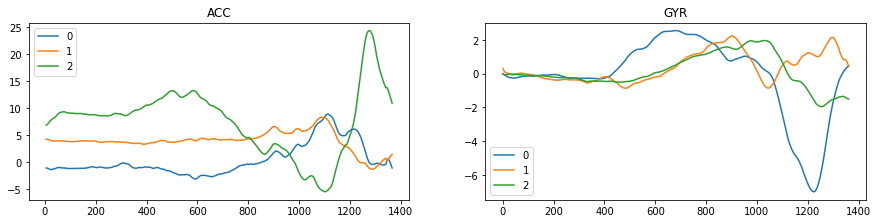

In [6]:
readings = df['readings'][0]
plot_all_readings(readings,  table_format=(4, 2))

#### Grafico dos dados interpolados

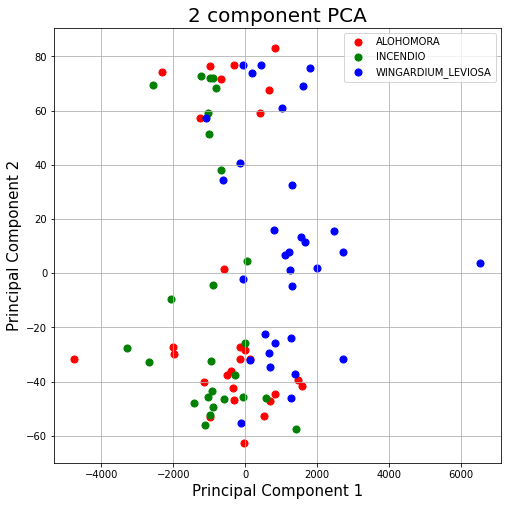

In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

X = []
y = []


datalist = database_train.datalist
for i, data in enumerate(datalist):
    X.append(data.readings['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)